In [33]:
import backtrader as bt
import backtrader.indicators as btind
import datetime
import pandas as pd
from pandas import Series, DataFrame
import random
from copy import deepcopy
import matplotlib.pyplot as plt

In [34]:
class rsiStrategy(bt.Strategy):

    def __init__(self):
        for d in self.getdatanames():
            self.rsi = bt.indicators.RSI_SMA(self.getdatabyname(d).close, period=21)

    def next(self):
        for d in self.getdatanames():
            pos = self.getpositionbyname(d).size or 0
            if not pos:
                if self.rsi < 30:
                    self.buy(data=self.getdatabyname(d),size=10)
            else:
                if self.rsi > 70:
                    self.sell(data=self.getdatabyname(d),size=10)
                
    def notify_trade(self,trade):
        if trade.isclosed:
            dt = self.data.datetime.date()
            
            print('---------------------------- TRADE ---------------------------------')
            print("1: Data Name:                            {}".format(trade.data._name))
            print("2: Bar Num:                              {}".format(len(trade.data)))
            print("3: Current date:                         {}".format(dt))
            print('4: Status:                               Trade Complete')
            print('5: Ref:                                  {}'.format(trade.ref))
            print('6: PnL:                                  {}'.format(round(trade.pnl,2)))
            print('--------------------------------------------------------------------')


In [35]:
class run:
    
    #training data
    Stocklist = ['GOOG','AAPL','MSFT']  
    
    #financials
    FinanceStocklist = ['AMG', 'AFL','ALL','AXP','AIG','AMP','AON','AJG','AIZ','BAC','BBT',
                 'BLK','HRB','BHF','COF','CBOE','SCHW','CB','CINF','C','CFG',
                 'CME','CMA','DFS','ETFC','RE','FITB','BEN','GS','HIG','HBAN','ICE',
                 'IVZ','JPM','KEY','LNC','L','MTB','MMC','MET','MCO','MS','NDAQ',
                 'NAVI','NTRS','PBCT','PNC','PFG','PGR','PRU','RJF','RF','SPGI','STT',
                 'STI','SIVB','SYF','TROW','BK','TRV','TMK','USB','UNM','WFC','WLTW',
                 'ZION']
    #informationtechnology
    ITStocklist = ['ACN','ATVI','ADBE','AMD','AKAM','ADS','GOOGL','GOOG','APH','ADI','ANSS',
                 'AAPL','AMAT','ADSK','ADP','AVGO','CDNS','CSCO','CTXS','CTSH','GLW',
                 'DXC','EBAY','EA','FFIV','FB','FIS','FISV','FLIR','IT','GPN',
                 'HRS','HPE','HPQ','INTC','IBM','INTU','IPGP','JNPR','KLAC','LRCX','MA',
                 'MCHP','MU','MSFT','MSI','NTAP','NFLX','NVDA','ORCL','PAYX','PYPL',
                 'QRVO','QCOM','RHT','CRM','STX','SWKS','SYMC','SNPS','TTWO','TEL','TXN',
                 'TSS','VRSN','V','WDC','WU','XRX','XLNX']
    #healthcare
    HealthStocklist = ['ABT','ABBV','A','ALXN','ALGN','AGN','ABC','AMGN','ANTM','BAX',
                 'BDX','BIIB','BSX','BMY','CAH','CELG','CNC','CERN','CI','DHR','DVA',
                 'XRAY','EW','GILD','HCA','HSIC','HOLX','HUM','IDXX',
                 'ILMN','INCY','ISRG','IQV','JNJ','LH','LLY','MCK','MDT','MRK','MTD',
                 'MYL','NKTR','PKI','PRGO','PFE','DGX','REGN','RMD','SYK','COO','TMO',
                 'UNH','UHS','VAR','VRTX','WAT','ZBH','ZTS']
    #energy
    EnergyStocklist = ['APC','APA','BHGE','COG','CVX','XEC','CXO','COP','DVN','EOG',
                 'EQT','XOM','HAL','HP','HES','KMI','MRO','MPC','NOV','NBL','OXY',
                 'OKE','PSX','PXD','RRC','SLB','FTI','VLO','WMB']
    
     #real estate
    REStocklist = ['ARE','AMT','AIV','AVB','BXP','CBRE','CCI','DLR','DRE','EQIX','EQR',
                   'ESS','EXR','FRT','HCP','HST','IRM','KIM','MAC','MAA','PLD','PSA',
                   'O','REG','SBAC','SPG','SLG','UDR','VTR','VNO','WELL','WY']
  
  
    Filter_start = datetime.date(2016,1,1)
    Filter_end = datetime.date(2017,12,31)
    def runstrategy(self):

            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(rsiStrategy)
            
            for i in (run.Stocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.Filter_start, todate=run.Filter_end)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
    
    start_date = datetime.date(2018,1,1)
    end_date = datetime.date(2019,12,31)
    def financesectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(rsiStrategy)
            
            for i in (run.FinanceStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
            
    def healthsectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(rsiStrategy)
            
            for i in (run.HealthStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
            
    def itsectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(rsiStrategy)
            
            for i in (run.ITStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
            
    def energysectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(rsiStrategy)
            
            for i in (run.EnergyStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
            
    def resectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(rsiStrategy)
            
            for i in (run.REStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))


---------------------------- TRADE ---------------------------------
1: Data Name:                            GOOG
2: Bar Num:                              143
3: Current date:                         2016-07-27
4: Status:                               Trade Complete
5: Ref:                                  1364
6: PnL:                                  475.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AAPL
2: Bar Num:                              143
3: Current date:                         2016-07-27
4: Status:                               Trade Complete
5: Ref:                                  1365
6: PnL:                                  103.7
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            MSFT
2: Bar Num:              

C:\Users\sweth\Anaconda3\lib\site-packages\backtrader\plot\plot.py:127: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\sweth\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sweth\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sweth\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\swe

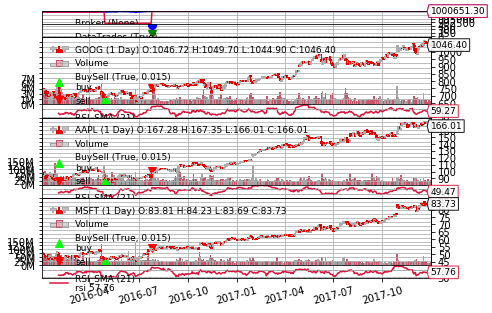

P/L: $651.3000000000466


In [36]:
strat1 = run()
strat1.runstrategy()

In [37]:
strat1.financesectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            AMG
2: Bar Num:                              264
3: Current date:                         2019-01-18
4: Status:                               Trade Complete
5: Ref:                                  1367
6: PnL:                                  -404.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AFL
2: Bar Num:                              264
3: Current date:                         2019-01-18
4: Status:                               Trade Complete
5: Ref:                                  1368
6: PnL:                                  50.5
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ALL
2: Bar Num:                 

---------------------------- TRADE ---------------------------------
1: Data Name:                            AMG
2: Bar Num:                              329
3: Current date:                         2019-04-24
4: Status:                               Trade Complete
5: Ref:                                  1433
6: PnL:                                  98.6
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AFL
2: Bar Num:                              329
3: Current date:                         2019-04-24
4: Status:                               Trade Complete
5: Ref:                                  1434
6: PnL:                                  -8.4
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ALL
2: Bar Num:                   

In [38]:
strat1.healthsectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            ABT
2: Bar Num:                              283
3: Current date:                         2019-02-15
4: Status:                               Trade Complete
5: Ref:                                  1499
6: PnL:                                  77.2
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ABBV
2: Bar Num:                              283
3: Current date:                         2019-02-15
4: Status:                               Trade Complete
5: Ref:                                  1500
6: PnL:                                  -54.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            A
2: Bar Num:                   

P/L: $11596.90000000014


In [39]:
strat1.itsectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            ACN
2: Bar Num:                              144
3: Current date:                         2018-07-27
4: Status:                               Trade Complete
5: Ref:                                  1557
6: PnL:                                  14.3
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ATVI
2: Bar Num:                              144
3: Current date:                         2018-07-27
4: Status:                               Trade Complete
5: Ref:                                  1558
6: PnL:                                  -5.9
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ADBE
2: Bar Num:                 

P/L: $4939.099999999395


In [40]:
strat1.energysectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            APC
2: Bar Num:                              88
3: Current date:                         2018-05-08
4: Status:                               Trade Complete
5: Ref:                                  1627
6: PnL:                                  97.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            APA
2: Bar Num:                              88
3: Current date:                         2018-05-08
4: Status:                               Trade Complete
5: Ref:                                  1628
6: PnL:                                  -4.1
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            BHGE
2: Bar Num:                    

---------------------------- TRADE ---------------------------------
1: Data Name:                            APC
2: Bar Num:                              265
3: Current date:                         2019-01-22
4: Status:                               Trade Complete
5: Ref:                                  1656
6: PnL:                                  -144.1
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            APA
2: Bar Num:                              265
3: Current date:                         2019-01-22
4: Status:                               Trade Complete
5: Ref:                                  1657
6: PnL:                                  -99.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            BHGE
2: Bar Num:               

In [41]:
strat1.resectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            ARE
2: Bar Num:                              268
3: Current date:                         2019-01-25
4: Status:                               Trade Complete
5: Ref:                                  1685
6: PnL:                                  -16.5
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AMT
2: Bar Num:                              268
3: Current date:                         2019-01-25
4: Status:                               Trade Complete
5: Ref:                                  1686
6: PnL:                                  167.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AIV
2: Bar Num:                 

---------------------------- TRADE ---------------------------------
1: Data Name:                            ARE
2: Bar Num:                              318
3: Current date:                         2019-04-08
4: Status:                               Trade Complete
5: Ref:                                  1717
6: PnL:                                  86.4
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AMT
2: Bar Num:                              318
3: Current date:                         2019-04-08
4: Status:                               Trade Complete
5: Ref:                                  1718
6: PnL:                                  140.1
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AIV
2: Bar Num:                  